In [68]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

# Задание

Допишите реализацию класса для обучения полиномиальной регресии, то есть по точкам $x_1, x_2, \dots, x_n$ и $y_1, y_2, \dots, y_n$ и заданному числу $d$ решить оптимизационную задачу:

$$ \sum_{i=1}^n (~f(x_i) - y_i~)^2 \min_f,$$ где f – полином степени не выше $d$.

**Примечание:** в этом задании оптимизационную задачу можно решать как с помощью scipy.optimize, так и сводя задачу к линейной регрессии и используя готовую формулу весов из нее. Предпочтительней второй путь, но первый вариант проще, и его можно использовать для проверки. Независимо от того, как вы решите эту задачу, сдавайте в форму ответ, в котором будете больше всего уверенны.

**Предупреждение:** проверка этого задания **не предполагает**, что вы решите его с помощью SGD, т.к. получить таким способом тот же ответ *очень* сложно.

In [162]:
class PolynomialRegression(object):
    
    def __init__(self, max_degree=1):
        self.max_degree = max_degree
        self.feature_extractor = PolynomialFeatures(max_degree+1)
        
    def fit(self, x, y):
        n = points_x.shape
        #Добавляем измерение для polynomialFeatures 
        x = x[:, np.newaxis]

        A = self.feature_extractor.fit_transform(x)
        A_t = A.transpose()
        inv_matrix = np.linalg.inv(np.matmul(A_t, A))
        self.w = np.mean(np.matmul(inv_matrix, A_t) * y, axis = 1)
        return self
    
    def predict(self, x):
        # insert your code here to predict the values
        x = np.array(x)
        x = x[:, np.newaxis]
        x = self.feature_extractor.fit_transform(x)
        return np.dot(x, self.w)

In [163]:
np.random.seed(42)
points_x = np.random.uniform(-10, 10, size=10)
# we use list comprehesion but think about how to write it using np.array operations
points_y = np.array([4 - x + x ** 2 + 0.1 * x ** 3 + np.random.uniform(-20, 20) for x in points_x])

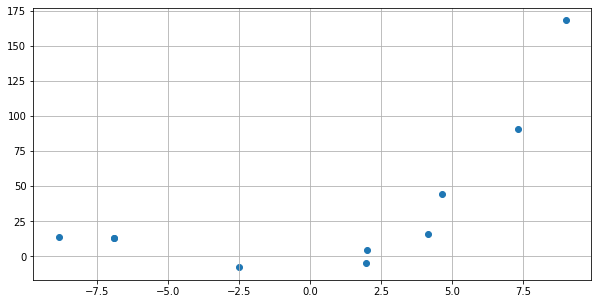

In [164]:
plt.figure(figsize=(10, 5))
plt.scatter(points_x, points_y)
plt.grid()
plt.show()

In [165]:
def plot_model(max_degree):
    plt.figure(figsize=(10, 5))
    plt.scatter(points_x, points_y)
    model = PolynomialRegression(max_degree).fit(points_x, points_y)
    all_x = np.arange(-10, 10.1, 0.1)
    plt.plot(all_x, model.predict(all_x))
    plt.grid()
    plt.show()

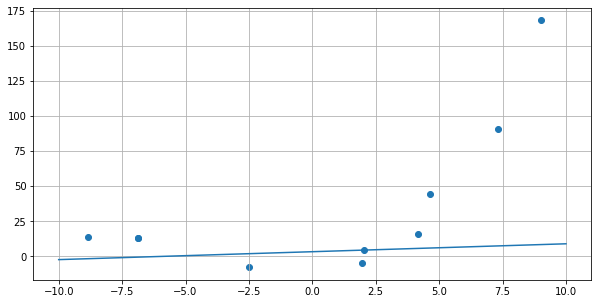

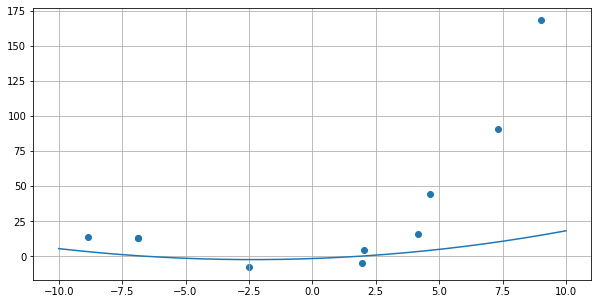

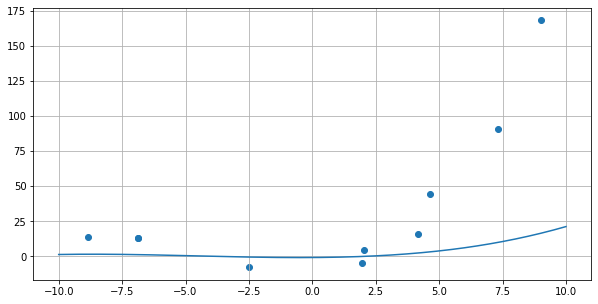

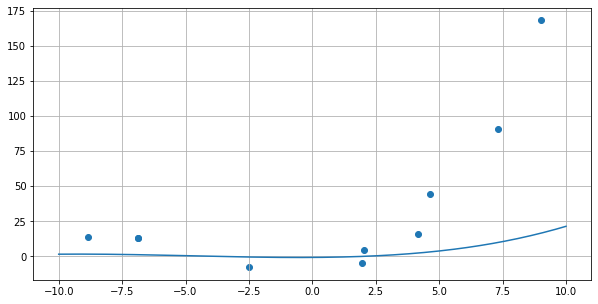

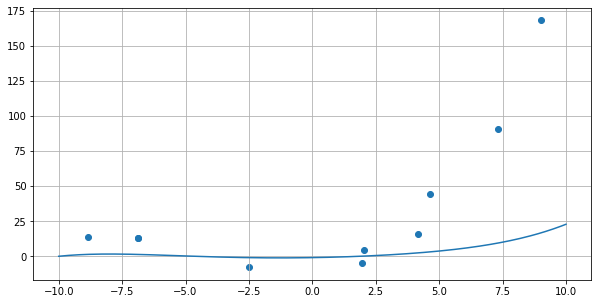

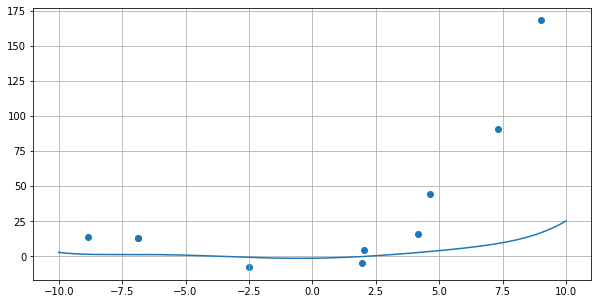

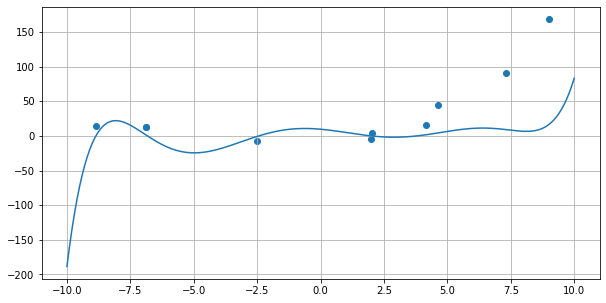

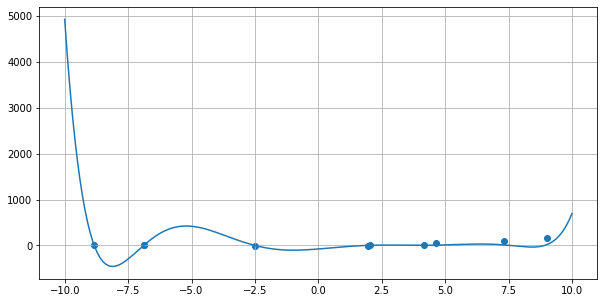

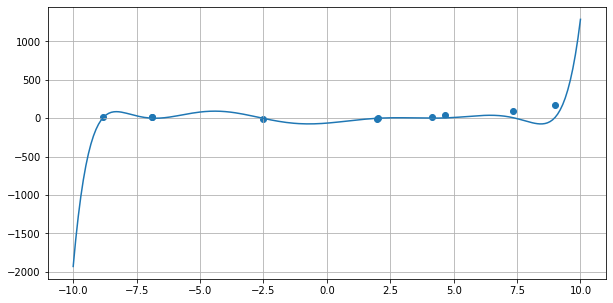

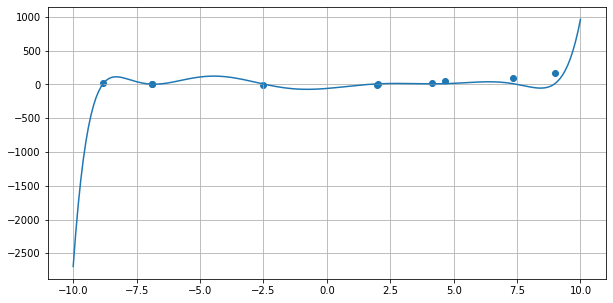

In [166]:
for i in range(10):
    plot_model(i)

Объясните почему графики меняются таким образом

**Значение для формы**

In [167]:
print(int(
    PolynomialRegression(7).fit(points_x, points_y).predict([10])[0]
    + PolynomialRegression(1).fit(points_x, points_y).predict([-5])[0]
    + PolynomialRegression(4).fit(points_x, points_y).predict([-15])[0]
))

653
